# Nearest Neighbors Regression
We now apply k-nearest neighbor to regression problems. First, we apply it to some simple generated data and then to the housing data that we used in the earlier experiments.

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import neighbors
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

import pandas as pd
%matplotlib inline

Let's generate some sample data using a fixed random seed to be able to reproduce the analysis later.

In [8]:
np.random.seed(1234)
x = np.sort(5 * np.random.rand(40, 1), axis=0)
T = np.linspace(0, 5, 500)[:, np.newaxis]
y = np.sin(x).ravel()

# Add noise to targets
y[::5] += 1 * (0.5 - np.random.rand(8))

Fit regression model with k of 5

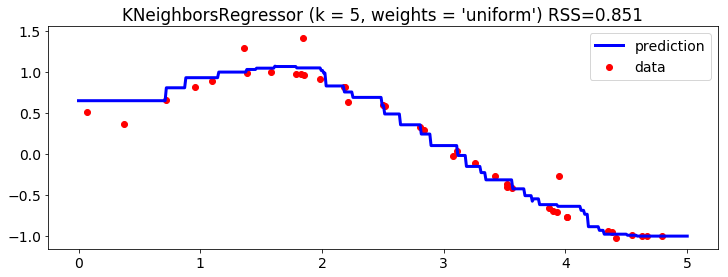

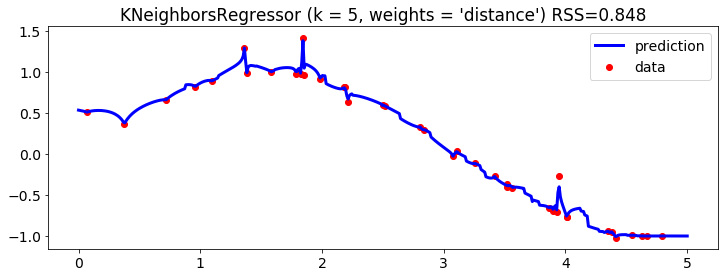

In [9]:
n_neighbors = 5

for i, weights in enumerate(['uniform', 'distance']):
    knn = neighbors.KNeighborsRegressor(n_neighbors, weights=weights)
    y_ = knn.fit(x, y).predict(T)
    
    scores = cross_val_score(knn, x, y, cv=KFold(n_splits=10, random_state=1234, shuffle=True))
    
    plt.figure(figsize=(12,9))
    font = {'family' : 'sans', 'size'   : 14}
    plt.rc('font', **font)
    plt.subplot(2, 1, i + 1)
    plt.scatter(x, y, c='red', label='data');
    plt.plot(T, y_, c='blue', label='prediction', linewidth=3);
    plt.axis('tight');
    plt.legend();
    plt.title("KNeighborsRegressor (k = %i, weights = '%s') RSS=%.3f" % (n_neighbors, weights, np.average(scores)));

plt.show();

Let's repeat the experiment using the housing data.

In [10]:
dataset = pd.read_csv('housing.csv')
dataset.columns
dataset.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [11]:
x = dataset['LSTAT'].values.reshape(506, 1)
y = dataset['MEDV'].values.reshape(506, 1)
T = np.linspace(np.min(x), np.max(x), 500)[:, np.newaxis]

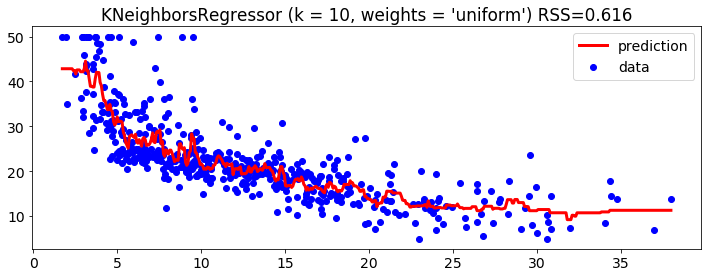

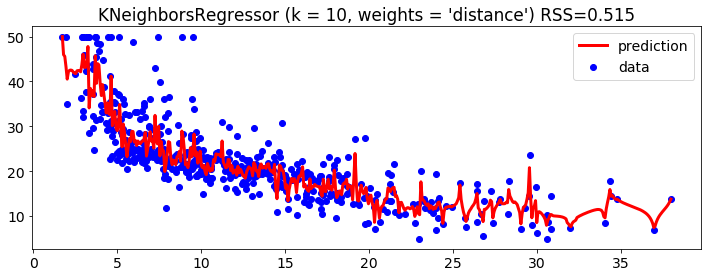

In [13]:
n_neighbors = 10

for i, weights in enumerate(['uniform', 'distance']):
    knn = neighbors.KNeighborsRegressor(n_neighbors, weights=weights)
    y_ = knn.fit(x, y).predict(T)
    
    scores = cross_val_score(knn, x, y, cv=KFold(n_splits=10, random_state=1234, shuffle=True))
    
    plt.figure(figsize=(12,9))
    font = {'family' : 'sans', 'size'   : 14}
    plt.rc('font', **font)
    plt.subplot(2, 1, i + 1)
    plt.scatter(x, y, c='blue', label='data');
    plt.plot(T, y_, c='red', linewidth=3, label='prediction');
    plt.axis('tight');
    plt.legend();
    plt.title("KNeighborsRegressor (k = %i, weights = '%s') RSS=%.3f" % (n_neighbors, weights, np.average(scores)));

plt.show();

Note that this is still an evaluation on training data. How does the prediction change when the value of k is decreased or increased?